In [0]:
from __future__ import print_function
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from google.colab import drive
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

In [5]:
# Levantamos el dataframe con las imagenes
drive.mount('/content/gdrive')

with open('/content/gdrive/My Drive/DSS 2018/DSS TPFinal/mercadolibre/data_frame_imagenes', 'r') as f:
  df_datos = pd.read_csv(f, sep=',')
  print(df_datos)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
      Unnamed: 0         0         1         2         3         4         5  \
0              0  0.721569  0.733333  0.686275  0.670588  0.686275  0.631373   
1              1  0.650980  0.627451  0.647059  0.643137  0.650980  0.650980   
2              2  0.294118  0.674510  0.631373  0.603922  0.580392  0.521569   
3              3  0.462745  0.596078  0.545098  0.505882  0.498039  0.466667   
4              4  0.392157  0.388235  0.364706  0.352941  0.254

In [6]:
# Divimos datos de entrenamiento y datos de valición.
X = df_datos[df_datos.columns[1:-1]].values # Desde la columna 1 hasta la columna anteultima.
y = df_datos[df_datos.columns[len(df_datos.columns)-1]].values # Solamente la ultima columna

x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42, 
)



num_classes = 9


# input image dimensions
img_rows, img_cols = 28, 28




if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)





x_train shape: (7200, 28, 28, 1)
7200 train samples
1800 test samples


In [7]:
# Definimos la arquitetura



model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) 

                 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax',name='preds'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [8]:
##Arquitectura VGG

##TODAS LAS VISUALIZACIONES DE ACTIVACIONES DE FILTROS Y HEAT MAP POR CLASES
## SE HICIERON BASADAS EN ESTE MODELO

model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Conv Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Conv Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# FC layers
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [0]:
# Compilamos
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(), 
              metrics=['accuracy']) ## ajustar el SGD para mejor performance

In [10]:
# Entrenamos nuestra red

batch_size = 128
epochs = 50


cars_train = model.fit(x_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 7200 samples, validate on 1800 samples
Epoch 1/50
7200/7200 [==============================] - 9s 1ms/step - loss: 2.1974 - acc: 0.1087 - val_loss: 2.1974 - val_acc: 0.0994
Epoch 2/50
7200/7200 [==============================] - 5s 631us/step - loss: 2.1973 - acc: 0.1064 - val_loss: 2.1975 - val_acc: 0.0994
Epoch 3/50
7200/7200 [==============================] - 5s 630us/step - loss: 2.1973 - acc: 0.1103 - val_loss: 2.1976 - val_acc: 0.0994
Epoch 4/50
7200/7200 [==============================] - 5s 626us/step - loss: 2.1973 - acc: 0.1140 - val_loss: 2.1976 - val_acc: 0.0994
Epoch 5/50
7200/7200 [==============================] - 4s 625us/step - loss: 2.1973 - acc: 0.1140 - val_loss: 2.1977 - val_acc: 0.0994
Epoch 6/50
7200/7200 [==============================] - 4s 618us/step - loss: 2.1973 - acc: 0.1140 - val_loss: 2.1978 - val_acc: 0.0994
Epoch 7/50
7200/7200 [==============================] - 5s 631us/step - loss: 2.1973 - acc: 0.1140 - val_loss: 2.1978 - val_acc: 0.0994
Ep

In [11]:
# Validamos el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.197848205566406
Test accuracy: 0.09944444444444445


In [0]:
#Guardamos el modelo entrenado en el Drive

#with open('/content/gdrive/My Drive/DSS 2018/DSS TPFinal/mercadolibre/cars_train_rn', 'wb') as f:
#        pickle.dump(cars_train, f)    

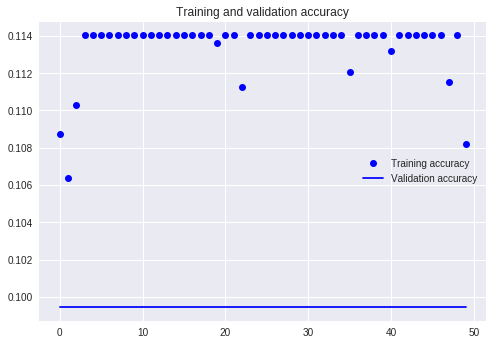

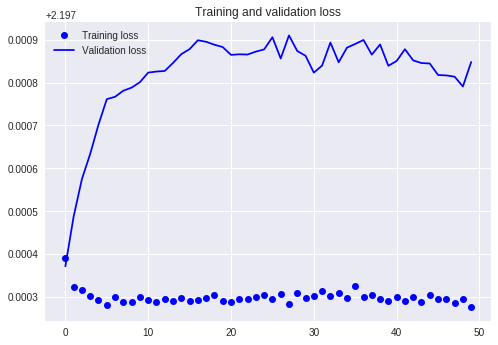

In [13]:
# Graficos
accuracy = cars_train.history['acc']
val_accuracy = cars_train.history['val_acc']
loss = cars_train.history['loss']
val_loss = cars_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
def plot_image(pixels, label, color="gray"):
    """
        Plot a image in 28x28pixels
    """
    pixels = pixels.reshape((28, 28))
    
    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap=color, interpolation=None)
    plt.show()

In [0]:
#!pip install -r https://raw.githubusercontent.com/Lasagne/Lasagne/v0.1/requirements.txt


In [15]:
from nolearn.lasagne import visualize

X = x_test[0].reshape(-1, 1, 28, 28)
visualize.plot_occlusion(model, x_test, target=[0])

# https://github.com/oswaldoludwig/Sensitivity-to-occlusion-Keras-/blob/master/occlusion_sensitivity.py
# Image occlusion
# https://www.oreilly.com/ideas/using-tensorflow-to-generate-images-with-pixelrnns

ModuleNotFoundError: ignored

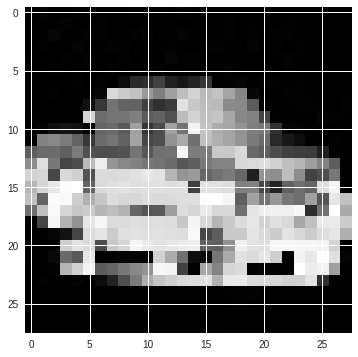

In [0]:
plt.imshow(x_test[10][:,:,0]);

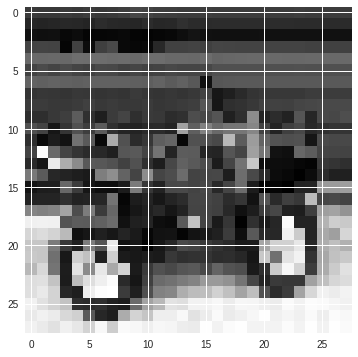

In [0]:
class_idx = 5
indices = np.where(y_test[:, class_idx] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(x_test[idx][..., 0], cmap="gray")


In [0]:
from vis.visualization import visualize_cam

In [0]:
grads = visualize_cam(model, 7, None, x_test[0][:,:, 0].reshape(28, 28, 1))

In [0]:
model.layers

In [0]:

plt.imshow(grads, cmap="jet")

NameError: ignored

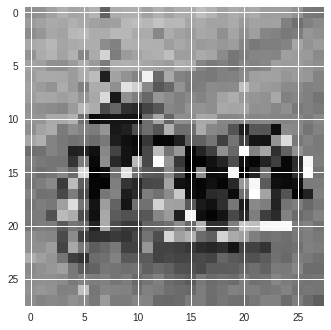

In [0]:
plt.imshow(x_test[0][:,:,0], cmap="gray")

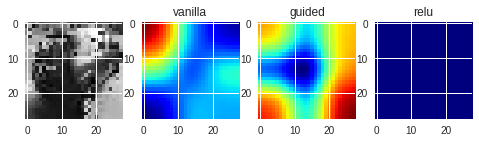

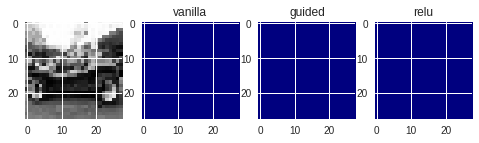

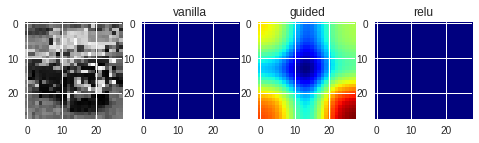

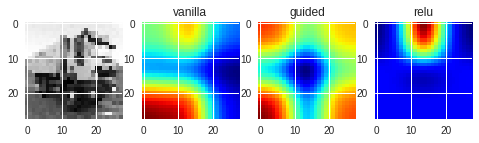

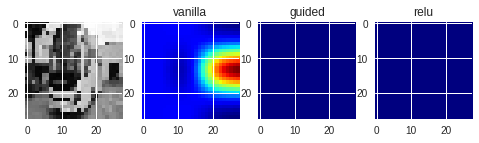

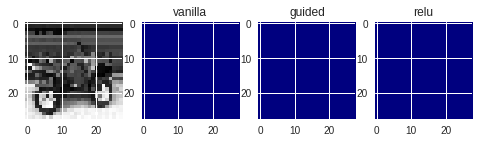

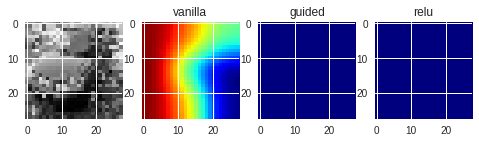

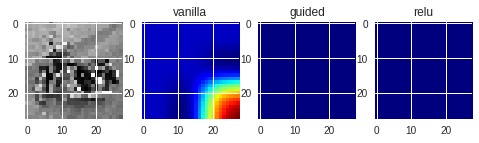

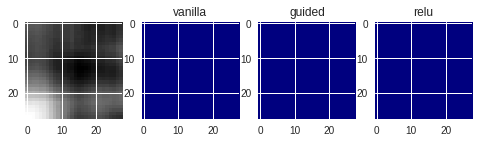

In [16]:
#!pip install keras-vis

from vis.visualization import visualize_cam

# This corresponds to the Dense linear layer.
for class_idx in np.arange(9):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 4)
    ax[0].imshow(x_test[idx][..., 0], cmap="gray")
    
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_cam(model, 13, filter_indices=class_idx, 
                              seed_input=x_test[idx], backprop_modifier=modifier)        
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)    
        ax[i+1].imshow(grads, cmap='jet')

In [0]:
len(model.layers)

14

In [0]:
"""def plot_conv_weights(model, layer):
    W = model.layers[layer].get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        print(W.shape)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[-1])) 
        fig, axs = plt.subplots(8,4, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(W.shape[2]):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))
"""

'def plot_conv_weights(model, layer):\n    W = model.layers[layer].get_weights()[0]\n    if len(W.shape) == 4:\n        W = np.squeeze(W)\n        print(W.shape)\n        W = W.reshape((W.shape[0], W.shape[1], W.shape[-1])) \n        fig, axs = plt.subplots(8,4, figsize=(8,8))\n        fig.subplots_adjust(hspace = .5, wspace=.001)\n        axs = axs.ravel()\n        for i in range(W.shape[2]):\n            axs[i].imshow(W[:,:,i])\n            axs[i].set_title(str(i))\n'

In [0]:
#plot_conv_weights(model,0)

In [0]:
tfrom keract import get_activations, display_activations

In [0]:
activations = get_activations(model, [x_test[500]])

In [0]:
x_test[0].shape, x_test[0][::,0].shape

((28, 28, 1), (28, 1))

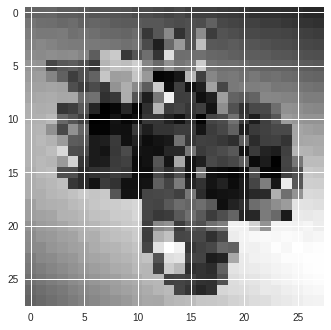

In [0]:
plt.imshow(x_test[0].reshape(28,28), interpolation="nearest", cmap="gray")

Displaying activation map 0


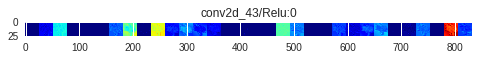

Displaying activation map 1


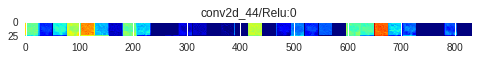

Displaying activation map 2


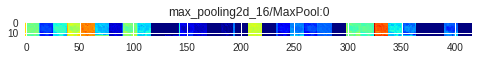

Displaying activation map 3


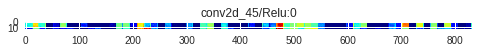

Displaying activation map 4


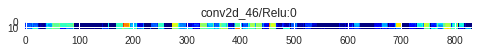

Displaying activation map 5


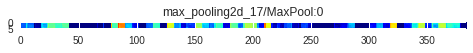

Displaying activation map 6


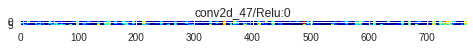

Displaying activation map 7


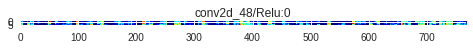

Displaying activation map 8


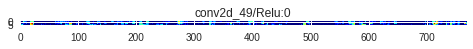

Displaying activation map 9


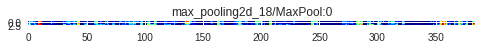

Displaying activation map 10


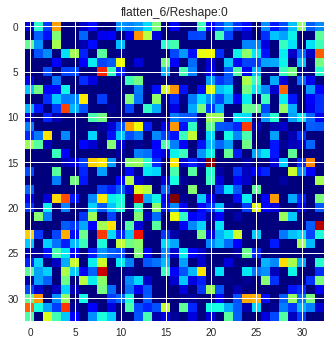

Displaying activation map 11


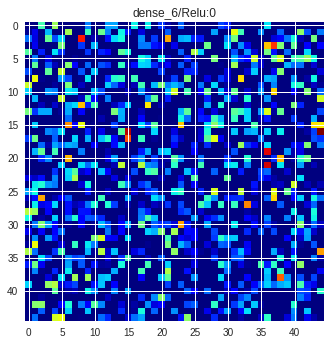

Displaying activation map 12


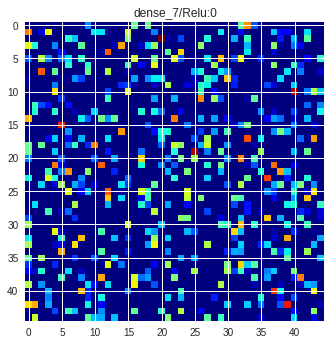

Displaying activation map 13


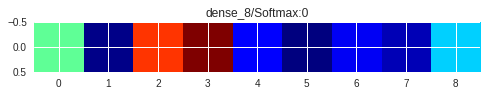

In [0]:
display_activations(activations)

In [0]:
model.predict_classes(x_test[500:501]) ## El color rojo en la escala de arriba indica la maxima probabilidad de un elemento corresponda a la clase

array([3])

In [0]:
y_test[500]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
model.predict(x_test[0:1])

array([[0.11164346, 0.11015993, 0.11250608, 0.11388122, 0.1104866 ,
        0.10997113, 0.10964346, 0.11055014, 0.11115796]], dtype=float32)